I started tracking the time I spend on various "work-related" activities near the beginning of my third year of grad school. When I started, I hadn't yet discovered the magic of tidy data so I kept putting off analyzing the data. Now that it's been over a year since I converted to tidy data, it's time to dig in and see how I really use my time! 

Tracking how I spend my time was motivated by my desire to understand how much time I was spending on classes and extracurriculars. Specifically, I became very involved in diversity and inclusion initiatives in BE as part of the BE Board, and I also spend quite a bit of time doing things for my department as a [BE Ref](http://berefs.com). I was also taking a class and interested in figuring out whether the time I spent on it matched the expected time on the syllabus.

In [308]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# The basic spreadsheet

I've been tracking my daily "timesheet" via google sheets for over a year now. The spreadsheet is farily simple: I enter the date, start and end times, category, "project", and location. I have formulas in the spreadsheet to convert start and end times to durations. I also extracted the weeknumber and weekday so that I could have a Pivot Table in a separate sheet that gave me running totals on time spent in each category per day and week.

I have 2017 and 2018 on separate worksheets, which I downloaded from google. Here, I read them in:

In [309]:
df17 = pd.read_csv('Timesheet - 2017.tsv', sep='\t')
df17 = df17.dropna(subset=['date'])
df17.dropna().tail()

,weeknumber,weekday,date,start,end,duration,category,project,location
1157,51,7,12/23,8:30 p,9:50 p,1:20,professional,website,plane
1158,52,1,12/24,11:35 a,12:10 p,0:35,professional,website,san_diego
1161,52,2,12/25,11:35 a,12:35 p,1:0,extracurricular,diversity,san_diego
1162,52,2,12/25,7:00 p,7:45 p,0:45,extracurricular,diversity,san_diego
1163,52,3,12/26,9:00 a,9:40 a,0:40,extracurricular,diversity,san_diego


In [310]:
df18 = pd.read_csv('Timesheet - 2018.tsv', sep='\t')
df18 = df18.dropna(subset=['date'])

In [311]:
df17['category'].unique(), df18['category'].unique()

(array(['science', 'professional', 'extracurricular', 'frisbee', 'class'],
       dtype=object),
 array(['science', 'professional', 'extracurricular', 'frisbee'],
       dtype=object))

Generally, I categorize my time into the same broad categories:

- **science**, which I use _very_ loosely to mean anything remotely lab-related. If I was in lab for long stretches of time, I tended to count that full time period here, regardless of how focused or productive I was. Seminars and meetings are also lumped in here, and often not de-aggregated.   
- **professional**, which I considered anything that felt like "work" but wasn't actually related to my science or research. Here, there's a lot of things related to my foray into the world of data science, as well as writing blog posts (like this one!) and making my website.   
- **extracurricular**, which is basically any MIT-related service or leadership work. The bulk of this is diversity and REFS work, but there are a few other random projects here and there.    
- **frisbee**, including practices and workouts. I actually didn't successfully consistently track this - especially last summer, when I had a very long commute to my frisbee games, I didn't really know how to track it. I also don't really care too much - frisbee makes me happy and healthy, and as long as I'm getting enough "real" work done I don't plan on toning this activity down ever.    
- **class**, including lectures and time spent doing homework. 

I'm specifically interested in the time I've spent on diversity vs. my other extracurriculars, so I need to do some wrangling to create a new "diversity" category before doing any plotting. Let's see what all I tracked, and I'll group all the ones I know are diversity-related together. Anything else we'll just lump together as "extracurricular".

In [312]:
# Print all the unique extracurricular projects I tracked
df17.query('category == "extracurricular"')['project'].unique()

array(['board', 'symposium', 'refs', 'diversity', nan, 'tutoring',
       'microbiome_club', 'soe_thing', 'interview_weekend', 'ideas',
       'graduate_women_of_excellence', 'cu_bme_alum', 'scfg', 'be_board',
       'be_gender_equality', 'addir', 'service_learning', 'c2c', 'beaap',
       'mbg', 'diversity_gsc', 'gradsage', 'outreach'], dtype=object)

In [313]:
df18.query('category == "extracurricular"')['project'].unique()

array(['diversity', 'refs', 'addir', 'be_board', 'mbg', 'gradsage',
       'microbiome_club', 'ideas', 'c2c'], dtype=object)

In [314]:
# Manually pick out the diversity-related ones and rename a column accordingly
diversity_projects = ['diversity', 'be_gender_equality', 'beaap', 'diversity_gsc']

def label_diversity(row):
    if row['category'] == 'extracurricular' and row['project'] in diversity_projects:
        return 'diversity'
    else:
        return row['category']

df17['category_toplot'] = df17.apply(label_diversity, axis=1)
df18['category_toplot'] = df18.apply(label_diversity, axis=1)

Next, I need to convert the google-calculated durations into minutes. Currently, these are strings in units of `hours:minutes`. I need to convert them to just numbers corresponding to the total minutes and hours. 

The pandas built-in string functions are very helpful here - learning that you can directly manipulate a column of strings with the `.str` prefix was a really large pandas-level-up moment in my grad life. Pro-tip, highly recommend!

In [315]:
df17['duration'].head()

0    2:15
1     5:0
2    0:30
3    3:24
4     4:0
Name: duration, dtype: object

In [316]:
df17['minutes'] = df17['duration']\
                    .str.split(':')\
                    .str[0]\
                    .astype(float)*60 \
                  + df17['duration']\
                    .str.split(':')\
                    .str[1]\
                    .astype(float)
df17['hours'] = df17['minutes']/60.0

df18['minutes'] = df18['duration']\
                    .str.split(':')\
                    .str[0]\
                    .astype(float)*60 \
                   + df18['duration']\
                    .str.split(':')\
                    .str[1]\
                    .astype(float)
df18['hours'] = df18['minutes']/60.0

In [317]:
df17.dropna().head()

,weeknumber,weekday,date,start,end,duration,category,project,location,category_toplot,minutes,hours
2,4,3,1/24,10:00 p,10:30 p,0:30,science,meta_analysis,home,science,30.0,0.500000
7,4,6,1/27,9:00 a,9:30 a,0:30,professional,blog,home,professional,30.0,0.500000
9,4,6,1/27,12:00 p,1:15 p,1:15,extracurricular,board,mit,extracurricular,75.0,1.250000
11,5,2,1/30,8:30 a,9:25 a,0:55,extracurricular,symposium,home,extracurricular,55.0,0.916667
13,5,2,1/30,1:30 p,2:15 p,0:45,extracurricular,refs,koch,extracurricular,45.0,0.750000


# Weekly analysis

Now, I can calculate the number of hours I spent on each category of work per week.

In [318]:
wk17 = df17\
    .groupby(['weeknumber', 'category_toplot'])\
    .sum()\
    ['hours']\
    .reset_index()
    
wk18 = df18\
    .groupby(['weeknumber', 'category_toplot'])\
    .sum()\
    ['hours']\
    .reset_index()

wk17.tail()

,weeknumber,category_toplot,hours
186,9,diversity,3.333333
187,9,extracurricular,17.150000
188,9,frisbee,1.500000
189,9,professional,1.166667
190,9,science,31.583333


Next, I need to convert my dates into something that pandas can read in as a DateTime data format. (Note: I have very little experience analyzing time series data with pandas, so my way of doing things with respect to timeseries data is almost certainly not the most optimal!)

Note: right now I'm looking at the time I spent on each category per week, so I'm converting each week into the date of the first day of that week (hence the `+ '0'` part).

In [319]:
wk17['datetime'] = pd.to_datetime('2017 ' + wk17['weeknumber'] + ' 0', format="%Y %W %w")
wk18['datetime'] = pd.to_datetime('2018 ' + wk18['weeknumber'] + ' 0', format="%Y %W %w")

# For some reason, my entry on Dec 31, 2017 gets counted as part of 2018 - I think bc it's technically week 53? 
# Was 2017 a leap year, is that why?
# It's only 20 minutes of science, so let's just drop it.
wk17 = wk17.query('weeknumber != "53"')

# I'll also concatenate both dataframes so I can plot continuously from 2017 to now.
wk = pd.concat((wk17, wk18))
wk.tail()

,weeknumber,category_toplot,hours,datetime
59,8,professional,0.750000,2018-02-25
60,8,science,40.416667,2018-02-25
61,9,diversity,14.250000,2018-03-04
62,9,extracurricular,5.583333,2018-03-04
63,9,science,25.666667,2018-03-04


We'll be using some of pandas' built-in plotting functions to get a quick look at this. I usually don't use pandas to plot, but I think in this case it will be the best at handling datetimes. 

That means we need to get our data *out* of tidy format and into a wide form that pandas can handle.

In [320]:
wk_wide = wk.pivot(columns='category_toplot', 
                  index='datetime', 
                  values='hours')

wk_wide.tail()

category_toplot,class,diversity,extracurricular,frisbee,professional,science
datetime,,,,,,
2018-04-08,NaN,2.916667,1.750000,NaN,3.500000,34.250000
2018-04-15,NaN,3.500000,5.083333,NaN,2.750000,29.583333
2018-04-22,NaN,2.333333,6.083333,NaN,2.416667,23.666667
2018-04-29,NaN,4.000000,3.500000,NaN,NaN,38.666667
2018-05-06,NaN,3.750000,3.833333,NaN,NaN,36.000000


Now we can plot! Let's see how much time I spent on each broad category last year.

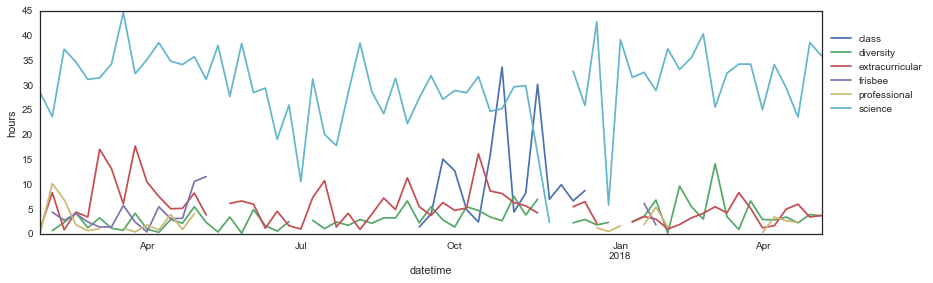

In [321]:
sns.set_style('white')
fig, ax = plt.subplots(figsize=(14, 4))
wk_wide.plot(kind='line', ax=ax)
ax.legend(loc='lower left', bbox_to_anchor=(1, 0.5))
ax.set_ylabel('hours')

This is kind of a mess. For now, let's keep just the main categories I'm interested in comparing: science, diversity, and extracurricular. We'll get to the others later.

In [322]:
wk_wide['total'] = wk_wide.drop('frisbee', axis=1).sum(axis=1)

In [323]:
wk_wide.sort_values(by='total', ascending=False).head()

category_toplot,class,diversity,extracurricular,frisbee,professional,science,total
datetime,,,,,,,
2017-10-29,33.733333,2.750000,8.250000,NaN,NaN,25.333333,70.066667
2017-10-01,12.833333,1.500000,4.833333,NaN,9.833333,29.000000,58.000000
2017-11-19,30.250000,7.083333,4.333333,NaN,NaN,16.250000,57.916667
2017-10-15,2.500000,4.833333,16.250000,NaN,NaN,31.833333,55.416667
2017-03-26,NaN,4.250000,17.816667,2.5,0.500000,32.400000,54.966667


(0, 60)

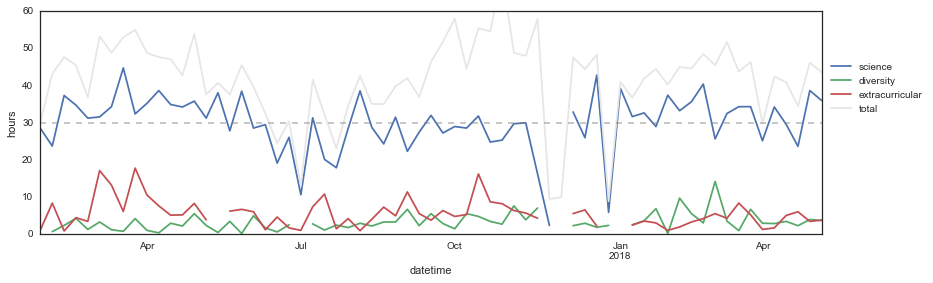

In [324]:
keepcols = ['science', 'diversity', 'extracurricular', 'total']
pal = sns.color_palette()
colors = [pal[0], pal[1], pal[2], '0.9']

sns.set_style('white')
fig, ax = plt.subplots(figsize=(14, 4))
wk_wide[keepcols].plot(kind='line', ax=ax, color=colors)
ax.axhline(30, color='gray', linestyle='--', alpha=0.5)
ax.legend(loc='lower left', bbox_to_anchor=(1, 0.5))
ax.set_ylabel('hours')
ax.set_ylim([0, 60])

I already knew this from monitoring my weekly pivot tables, but I think the most surprising finding I've had from this process is actually how much *less* I work than I thought. I rarely hit a full 40-hour workweek, and my average is much more around 30 hours (if even). Maybe that's the French person in me, or maybe that's a reflection that a computational PhD involves fewer contact hours than an experimental one. 

In [325]:
print('mean hours per week')
wk.query('category_toplot == @keepcols').groupby('category_toplot').mean()

mean hours per week


,hours
category_toplot,
diversity,3.366935
extracurricular,5.640054
science,29.947475


I'm actually pretty torn about this result: on the one hand, I think that spending an average of 30 hours per week on *doing science* is less than I'd like, and on the other hand I'm not sure I *need* to be spending more than that. I've been quite productive this year and my advisor seems very pleased with my progress, so from the PhD standpoint I'd say that whatever I'm doing is certainly "enough." I also think that there's a lot to be said about how consistently I hit 30 hours - it seems to be where my steady-state is, at least during the semesters, and I know that weeks when I do more than that are really mentally exhausting. I put a lot of weight into trusting what my body needs and wants, and from this data it looks like that's a 30-hour workweek. (Don't tell my future employers ack!)

I think the low work hours has to do with being computational vs. experimental: something that's not tracked is how much of my brain I'm using for each of these hours. I think a lot of experimental work involves a lot of wasted time: short incubation periods, repetitive actions, checking in on cells, etc. Computational work, on the other hand, has slightly less downtime. So a 30-hour computational workweek uses up as much of my brain as a 40-hour experimental workweek would, maybe.

All that said, I almost certainly work much less than most of my peers (on science). Which doesn't feel great, I guess.

Anyway, enough of that - it is what it is. An important next question that I wanted to answer when I started this is: do I sacrifice science for extracurriculars, or are my extracurriculars just added on top of my research?

To answer this, I'll see if the number of hours I spend on diversity or extracurriculars correlates negatively with the number of hours I spend on work.

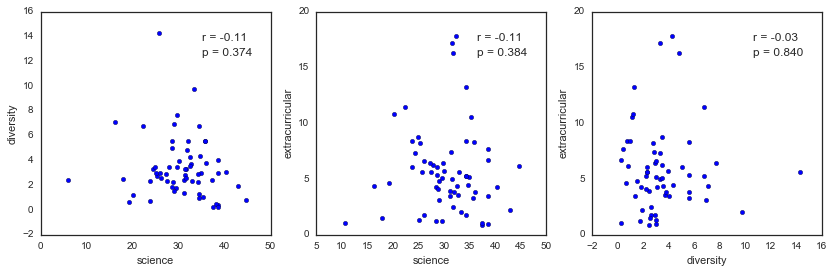

In [326]:
from scipy.stats import pearsonr, spearmanr

corrfun = spearmanr

fig, ax = plt.subplots(1, 3, figsize=(14, 4))

# Prepare data
x = 'science'
y = 'diversity'
tmp = wk_wide[[x, y]].dropna()

# Plot
ax[0].scatter(tmp[x], tmp[y])
ax[0].set_xlabel(x)
ax[0].set_ylabel(y)

# Print correlation
ax[0].text(0.7, 0.87, 
           'r = {:.2f}'.format(corrfun(tmp[x], tmp[y])[0]), 
           transform=ax[0].transAxes,
           fontsize='large')
ax[0].text(0.7, 0.8, 
           'p = {:.3f}'.format(corrfun(tmp[x], tmp[y])[1]), 
           transform=ax[0].transAxes,
           fontsize='large')

y = 'extracurricular'
tmp = wk_wide[[x, y]].dropna()
ax[1].scatter(tmp[x], tmp[y])
ax[1].set_xlabel(x)
ax[1].set_ylabel(y)

# Print correlation
ax[1].text(0.7, 0.87, 
           'r = {:.2f}'.format(corrfun(tmp[x], tmp[y])[0]), 
           transform=ax[1].transAxes,
           fontsize='large')
ax[1].text(0.7, 0.8, 
           'p = {:.3f}'.format(corrfun(tmp[x], tmp[y])[1]), 
           transform=ax[1].transAxes,
           fontsize='large')

x = 'diversity'
tmp = wk_wide[[x, y]].dropna()
ax[2].scatter(tmp[x], tmp[y])
ax[2].set_xlabel(x)
ax[2].set_ylabel(y)

# Print correlation
ax[2].text(0.7, 0.87, 
           'r = {:.2f}'.format(corrfun(tmp[x], tmp[y])[0]), 
           transform=ax[2].transAxes,
           fontsize='large')
ax[2].text(0.7, 0.8, 
           'p = {:.3f}'.format(corrfun(tmp[x], tmp[y])[1]), 
           transform=ax[2].transAxes,
           fontsize='large')


There doesn't seem to be a negative correlation between the time I spend on science and diversity or extracurriculars - shew! (?) I'm not sure what I expected here - while I do find some weeks frustratingly dominated by non-science activities, I also tend to work more total hours those weeks. That might actually bias me toward _expecting_ a negative correlation, since I usually finish those weeks super drained and dissatisfied with my progress. But it looks like for the most part, I seem to make it work - and just add my extracurriculars on top of my science. *unenthusiastic woo*

As an aside, the part of me that wants to advocate for a diversity-focused staff member in my department was hoping that there would be a strong negative correlation here. I think it'd be powerful to show my department head that the work I do for our department negatively affects my scientific progress. But on a personal level, I'm glad I haven't let it and have instead kept avoiding the conflict about whether or not we can "have it all." That said, it's obviously [not sustainable](/posts/2018/02/hitting-diversity-wall). 

# Days of the week

Now that I have a sense of general trends per week, let's see if looking at the data on a daily basis can tell us other things.

In [327]:
# I need to convert the original dataframe (not aggregated by week) to
# a datetime with the year in order to concatenate them
df17['datetime'] = pd.to_datetime(df17['date'] + '/17')
df18['datetime'] = pd.to_datetime(df18['date'] + '/18')

df = pd.concat((df17, df18))
print(df17.shape, df18.shape, df.shape)

((1168, 13), (413, 13), (1581, 13))


In [328]:
# Sum hours in each category per day
day = df.query('category_toplot != "frisbee"')\
        .groupby(['datetime', 'category_toplot'])\
        .sum()\
        .reset_index()

# Convert to wide form for pandas plotting
day_wide = day.pivot(
    columns='category_toplot', 
    index='datetime', 
    values='hours')

colorder = ['science', 'class', 'extracurricular', 'diversity', 'professional']
day_wide = day_wide[colorder]

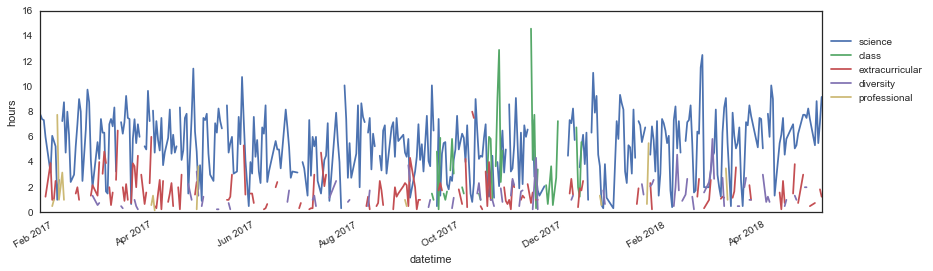

In [329]:
fig, ax = plt.subplots(figsize=(14, 4))
day_wide.plot(kind='line', ax=ax)
#ax.axhline(30, color='gray', linestyle='--', alpha=0.5)
ax.legend(loc='lower left', bbox_to_anchor=(1, 0.5))
ax.set_ylabel('hours')

Hah, those two spikes for "class" in the middle of the semester were my machine learning homeworks #2 and 3. Womp womp. You can also see my trip to Greece in late November 2017, where I did no work (but unfortunately still had to study for and take my machine learning exam, lol). But other than that, this is too much data to get anything meaningful out of. I'm glad I did my first analysis on a per-week basis!

Let's see if there's any patterns in how many hours I work per day... Specifically, I'm interested in seeing if there are weekly patterns for my work habits - do I tend to work on certain things on certain days, or is it pretty evenly distributed?

In [330]:
# Let's add the weekday indicator back to our aggregated dataframe
day = pd.merge(
    day, df[['datetime', 'weekday']], 
    left_on='datetime', right_on='datetime', 
    how='left')\
    .drop_duplicates()

#num2day = {'1': 'Sun', '2': 'Mon', '3': 'Tues', '4': 'Wed', '5': 'Thurs', '6': 'Fri', '7': 'Sat'}
#day = day.dropna(subset=['weekday'])
#day['day'] = day['weekday'].apply(lambda x: num2day[x])
day.head()

,datetime,category_toplot,minutes,hours,weekday
0,2017-01-24,science,465.0,7.750000,3
3,2017-01-25,science,444.0,7.400000,4
5,2017-01-26,science,440.0,7.333333,5
7,2017-01-27,extracurricular,75.0,1.250000,6
11,2017-01-27,professional,30.0,0.500000,6


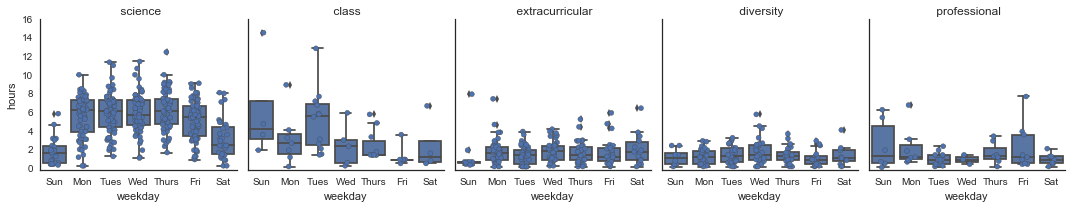

In [331]:
# Now we can easily plot category vs. day with seaborn

g = sns.FacetGrid(data=day, col='category_toplot', 
                  sharex=True, sharey=True, 
                  col_order=colorder)
g.map(sns.boxplot, 'weekday', 'hours')
g.map(sns.stripplot, 'weekday', 'hours', 
      jitter=0.15, linewidth=0.4)

# Rename x-axis labels and subplot titles
day_names = ['Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat']
for ax in g.axes[0]:
    ax.set_xticklabels([day_names[int(i.get_text())-1] for i in ax.get_xticklabels()])
    ax.set_title(ax.get_title().split('=')[1])
    ax.set_ylim([-0.1, None])

Hah again - problem sets for the class I took were due on Tuesday nights, so you can clearly a few outlier points on Sunday, Monday, and Tuesday on my class plot - these are the two problem sets that killed me. lulz. I had lecture on Tuesdays/Thursday I'm pretty sure, which you can also sort of see. Not sure what I was doing on Wednesdays, to be honest - I can promise you I wasn't studying!

I'm honestly surprised at how much I work on the weekends - lately it's felt like I rarely do any work on weekends, but I guess I still manage to get into lab/work mode more often than I realized. Also interesting to see how flat the distributions are for diversity and extracurricular work - I could've sworn I did more of this work on the weekends. The one thing that has born out, though, is that I tend to do my "professional" work on Sundays. This usually happens when I don't want to do "real" work after a long week, but still want to feel productive. It's like productive procrastination, yippee!

Just for funsies, let's see whether I've started working less on weekends recently...

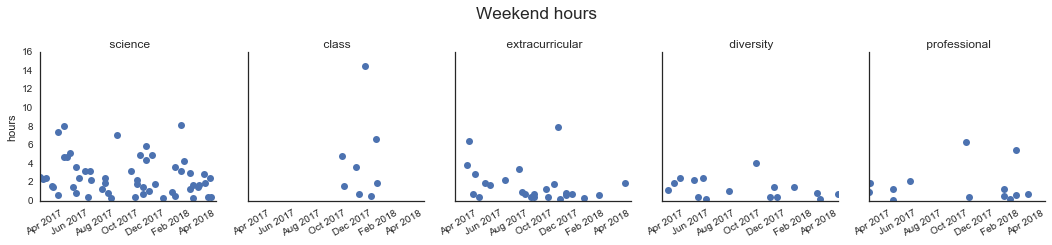

In [332]:
weekends = ['1', '7']

tmp = day.query('weekday == @weekends').groupby(['datetime', 'category_toplot']).sum().reset_index()

g = sns.FacetGrid(col='category_toplot', data=tmp, col_order=colorder)
g.map(plt.plot_date, 'datetime', 'hours')

plt.gcf().autofmt_xdate()

for ax in g.axes[0]:
    ax.set_title(ax.get_title().split('=')[1])
    ax.set_xlabel('')
plt.suptitle('Weekend hours', fontsize='xx-large', y=1.1)

It doesn't really look like it - you can see that I didn't work too much on weekends last summer, and I might be working less this semester too. But in general, nothing particularly striking here. One thing that might explain this is that I've been traveling a lot this semester, and I tend to try to do work in transit, which often falls on weekends...

Ok, so since the data shows that I don't tend to do more or less diversity/extracurricular work on the weekends, I think that means I do more of this at night. Let's find out!

# Time of day

Let's look at how early and late I work on different categories. 

In [333]:
# Convert strings to times using pandas datetime 
# This converts the time to today + a time, which is fine for plotting
df['start_datetime'] = pd.to_datetime(df['start'])
df['end_datetime'] = pd.to_datetime(df['end'])

In [334]:
# Start time
start = df.groupby(['datetime', 'category_toplot'])\
          .min()\
          ['start_datetime']\
          .reset_index()
# End time
end = df.groupby(['datetime', 'category_toplot'])\
          .max()\
          ['end_datetime']\
          .reset_index()

time = pd.merge(start, end, how='outer')
#time.head()

In [335]:
# Need to add in the weekday column again
time = pd.merge(time, day, how='left')
time = time.dropna()
time.head()

,datetime,category_toplot,start_datetime,end_datetime,minutes,hours,weekday
0,2017-01-24,science,2018-05-06 10:00:00,2018-05-06 22:30:00,465.0,7.750000,3
1,2017-01-25,science,2018-05-06 10:36:00,2018-05-06 19:00:00,444.0,7.400000,4
2,2017-01-26,science,2018-05-06 10:00:00,2018-05-06 18:00:00,440.0,7.333333,5
3,2017-01-27,extracurricular,2018-05-06 12:00:00,2018-05-06 13:15:00,75.0,1.250000,6
4,2017-01-27,professional,2018-05-06 09:00:00,2018-05-06 09:30:00,30.0,0.500000,6


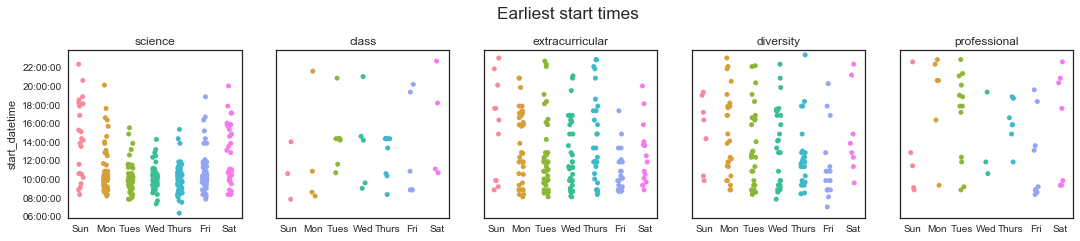

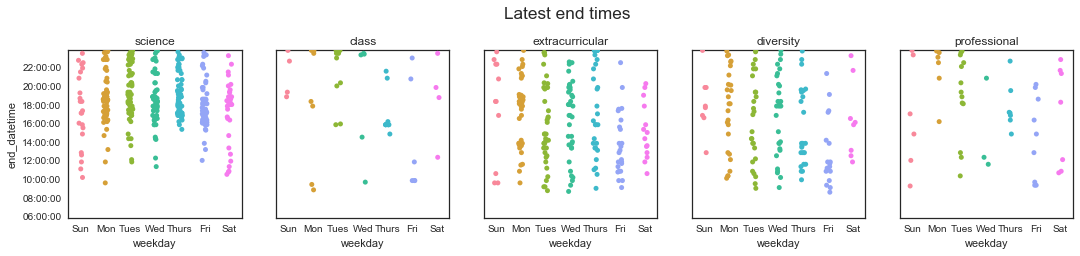

In [336]:
# FacetGrid is breaking with the datetime data, let's just do it manually..

# Plot start times in top row
fig, ax = plt.subplots(1, len(colorder), figsize=(18, 3))
i = 0

for i in range(len(colorder)):
    cat = colorder[i]
    tmp = time.query('category_toplot == @cat')
    sns.stripplot(data=tmp, x='weekday', y='start_datetime', ax=ax[i], jitter=True)
    ax[i].set_title(cat)
    ax[i].set_ylim([pd.to_datetime('6:00 am'), pd.to_datetime('11:59 pm')])
    if i > 0:
        ax[i].set_yticklabels('')
        ax[i].set_ylabel('')
    # Replace x-tick labels with days
    ax[i].set_xticklabels([day_names[int(j.get_text())-1] for j in ax[i].get_xticklabels()])
    ax[i].set_xlabel('')
    i += 1
fig.suptitle('Earliest start times', fontsize='xx-large', x=0.51, y=1.1)

# Plot end times in bottom rown
fig, ax = plt.subplots(1, len(colorder), figsize=(18, 3))
i = 0

for i in range(len(colorder)):
    cat = colorder[i]
    tmp = time.query('category_toplot == @cat')
    sns.stripplot(data=tmp, x='weekday', y='end_datetime', ax=ax[i], jitter=True)
    ax[i].set_title(cat)
    ax[i].set_ylim([pd.to_datetime('6:00 am'), pd.to_datetime('11:59 pm')])
    if i > 0:
        ax[i].set_yticklabels('')
        ax[i].set_ylabel('')
    ax[i].set_xticklabels([day_names[int(j.get_text())-1] for j in ax[i].get_xticklabels()])
    i += 1
fig.suptitle('Latest end times', fontsize='xx-large', x=0.51, y=1.1)


Hey, look at that! It looks like I manage to get started working before noon most weekdays! Woohoo! I'd say for a purely computational person, this was not a given! (This makes up a little for my disappointing 30-hour workweek, I'm not gonna lie...) It also looks like I tend to stop working either in the late afternoon/evening, or late at night. This makes sense - I usually leave lab around 6-8 pm, but sometimes I'll do a little bit more work when I get home or before bed if I need to finish something up.

From the class plot, you can see that I had lecture Tuesday/Thursdays at 2:30 pm until 4 pm - and that most Thursdays, that was the end of the time I spent on class!

I'm finding it more difficult to compare my extracurricular habits with my work - from this data, it doesn't look like there's a huge difference in terms of which category I spend more of my night time on. I think this might have to do with the fact that I often piggy-back my "extra" work - I'll be sitting on my couch in my room and have a few more work things to bang out, and then I'll also finish up a short diversity/Refs email or document I'm writing.

Let's see if I can dig a little deeper and see when I start and finish "quality" time. I suspect that many of the earlier "science" start times are me answering emails/checking on data over breakfast, and that many of the later ones are just short-and-quick things I finished up before bed.

Let's re-do the analysis, but only consider the start and end times of chunks that lasted more than 45 minutes.

In [337]:

# Start quality time
quality_duration = 45
start_qual = df\
          .query('minutes > @quality_duration')\
          .groupby(['datetime', 'category_toplot'])\
          .min()\
          ['start_datetime']\
          .reset_index()
# End quality time
end_qual = df\
          .query('minutes > @quality_duration')\
          .groupby(['datetime', 'category_toplot'])\
          .max()\
          ['end_datetime']\
          .reset_index()

time_qual = pd.merge(start_qual, end_qual, how='outer')

# Add in the weekday column again
time_qual = pd.merge(time_qual, day, how='left')
time_qual.head()

,datetime,category_toplot,start_datetime,end_datetime,minutes,hours,weekday
0,2017-01-24,science,2018-05-06 10:00:00,2018-05-06 18:00:00,465.0,7.750000,3
1,2017-01-25,science,2018-05-06 10:36:00,2018-05-06 19:00:00,444.0,7.400000,4
2,2017-01-26,science,2018-05-06 10:00:00,2018-05-06 18:00:00,440.0,7.333333,5
3,2017-01-27,extracurricular,2018-05-06 12:00:00,2018-05-06 13:15:00,75.0,1.250000,6
4,2017-01-27,science,2018-05-06 10:15:00,2018-05-06 18:45:00,360.0,6.000000,6


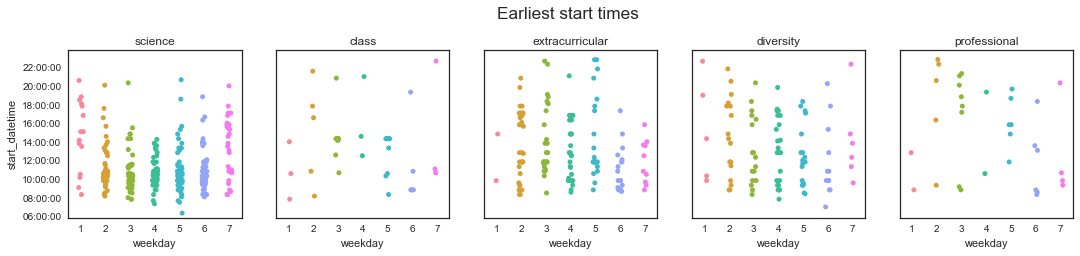

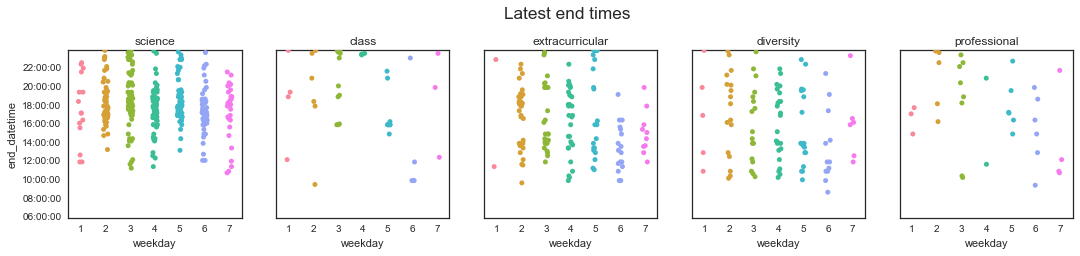

In [338]:
# FacetGrid is breaking with the datetime data, let's just do it manually..

# Plot start times
fig, ax = plt.subplots(1, len(colorder), figsize=(18, 3))
i = 0

for i in range(len(colorder)):
    cat = colorder[i]
    tmp = time_qual.query('category_toplot == @cat')
    sns.stripplot(data=tmp, x='weekday', y='start_datetime', ax=ax[i], jitter=True)
    ax[i].set_title(cat)
    ax[i].set_ylim([pd.to_datetime('6:00 am'), pd.to_datetime('11:59 pm')])
    if i > 0:
        ax[i].set_yticklabels('')
        ax[i].set_ylabel('')
    i += 1
fig.suptitle('Earliest start times', fontsize='xx-large', x=0.51, y=1.1)

# Plot end times
fig, ax = plt.subplots(1, len(colorder), figsize=(18, 3))
i = 0

for i in range(len(colorder)):
    cat = colorder[i]
    tmp = time_qual.query('category_toplot == @cat')
    sns.stripplot(data=tmp, x='weekday', y='end_datetime', ax=ax[i], jitter=True)
    ax[i].set_title(cat)
    ax[i].set_ylim([pd.to_datetime('6:00 am'), pd.to_datetime('11:59 pm')])
    if i > 0:
        ax[i].set_yticklabels('')
        ax[i].set_ylabel('')
    i += 1
fig.suptitle('Latest end times', fontsize='xx-large', x=0.51, y=1.1)


Huh, interesting - that didn't really change anything, except by reducing the total number of points on these plots. In fact, a couple of science start times popped way up! Those are grumpy days, when it takes me until 8 pm to get more than 45 minutes of uninterrupted work in... (gr)

I guess one of my assumptions about how I distribute my work throughout the day is wrong and one is right: I knew that I work pretty much all the time, but I didn't realize that I did that with both science *and* my extracurriculars!

# Early bird gets the worm?

Okay, now a question that I'm afraid to answer. Does the total amount of (science) work that I do correlate with the time that I start working (on anything)?

I know that I tend to be most productive in the morning, but I also know that I like to sleep in. My usual morning routine is that I wake up at 8 am, have breakfast, check emails, and read various emails/articles until 9 or 9:30, get ready, and catch the bus around 9:30 or 10. When I lived in Beacon Hill and took the T instead of the bus, I had a similar schedule but wasted a little less time in the mornings (I think).

However, some days I'll get to work super early and feel SUPER productive on those days. Am I really working more hours on those days, or do I just go home earlier? Are my boosted feelings of productivity coming from actual productivity, or just from not feeling like a lazy slob?

To answer this, we'll first make a dataframe with each day, earliest start time (on anything or on science), and total hours spent on science. To be fair, let's only count weekdays.

In [339]:
weekdays = ['2', '3', '4', '5', '6']

# Earliest start time on anything
earliest = df\
    .query('weekday == @weekdays')\
    .groupby('datetime')\
    .min()\
    ['start_datetime']\
    .reset_index()

# Earliest start time on science
earliest_sci = df\
    .query('weekday == @weekdays')\
    .query('category == "science"')\
    .groupby('datetime')\
    .min()\
    ['start_datetime']\
    .reset_index()\
    .rename(columns={'start_datetime': 'start_sci'})
    
# Total hours
science = df\
    .query('category == "science"')\
    .query('weekday == @weekdays')\
    .groupby('datetime')\
    .sum()\
    ['hours']\
    .reset_index()

# And combine them
earlybird = pd.merge(earliest, science, how='outer')
earlybird = pd.merge(earlybird, earliest_sci, how='outer')

# Fill any days which had a start time but no science hours with 0 hours (womp)
earlybird['hours'] = earlybird['hours'].fillna(0.0)

print(earliest.shape, science.shape, earlybird.shape)
earlybird.head()

((322, 2), (314, 2), (322, 4))


,datetime,start_datetime,hours,start_sci
0,2017-01-24,2018-05-06 10:00:00,7.750000,2018-05-06 10:00:00
1,2017-01-25,2018-05-06 10:36:00,7.400000,2018-05-06 10:36:00
2,2017-01-26,2018-05-06 10:00:00,7.333333,2018-05-06 10:00:00
3,2017-01-27,2018-05-06 09:00:00,6.000000,2018-05-06 10:15:00
4,2017-01-30,2018-05-06 08:30:00,3.166667,2018-05-06 10:10:00


Drum roll please...

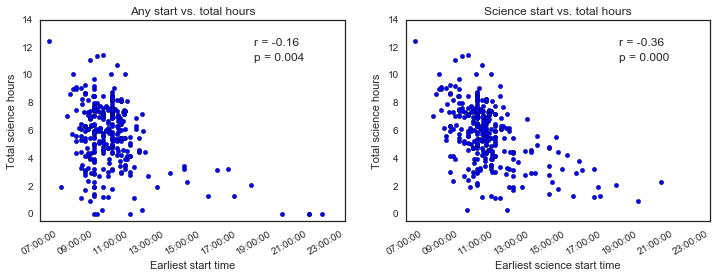

In [340]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Use matplotlib scatter to be able to later use autofmt_xdate()
ax[0].scatter(earlybird['start_datetime'].values, earlybird['hours'].values)
ax[0].set_xlim([pd.to_datetime('6:00 am'), pd.to_datetime('11:00 pm')])
ax[0].set_ylim([-0.5, None])

ax[0].set_ylabel('Total science hours')
ax[0].set_xlabel('Earliest start time')
ax[0].set_title('Any start vs. total hours')

ax[1].scatter(earlybird['start_sci'].values, earlybird['hours'].values)
ax[1].set_xlim([pd.to_datetime('6:00 am'), pd.to_datetime('11:00 pm')])
ax[1].set_ylim([-0.5, None])

ax[1].set_ylabel('Total science hours')
ax[1].set_xlabel('Earliest science start time')
ax[1].set_title('Science start vs. total hours')

fig.autofmt_xdate()

# Add correlations
ax[0].text(0.7, 0.87, 
           'r = {:.2f}'.format(spearmanr(earlybird['start_datetime'], earlybird['hours'])[0]), 
           transform=ax[0].transAxes,
           fontsize='large')
ax[0].text(0.7, 0.8, 
           'p = {:.3f}'.format(spearmanr(earlybird['start_datetime'], earlybird['hours'])[1]), 
           transform=ax[0].transAxes,
           fontsize='large')
ax[1].text(0.7, 0.87, 
           'r = {:.2f}'.format(spearmanr(earlybird['start_sci'], earlybird['hours'])[0]), 
           transform=ax[1].transAxes,
           fontsize='large')
ax[1].text(0.7, 0.8, 
           'p = {:.3f}'.format(spearmanr(earlybird['start_sci'], earlybird['hours'])[1]), 
           transform=ax[1].transAxes,
           fontsize='large')

Haha, looks like there's good news and bad news. Good news: there isn't really a strong correlation between the time of day that I start working and how much total science work I get done . Yes, I know the p value is significant, but the correlation is not very strong - and I imagine it's being driven mostly by the post-1 pm points. Obviously if I start working after noon, then I won't get as much work done. That's not really what I'm interested in though, I'm concerned about starting at 8 am vs. 11 am, for example. 

Actually, I should probably check that...

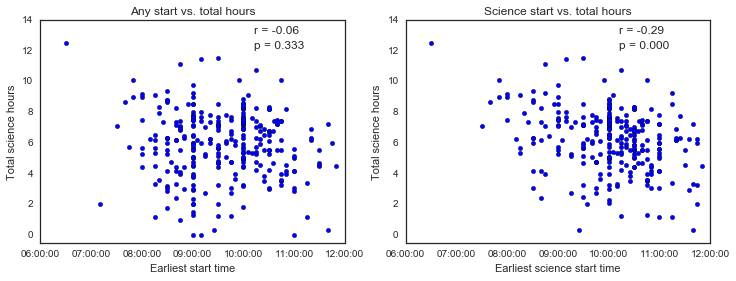

In [341]:
noon = pd.to_datetime('12:00 pm')
tmp = earlybird.query('start_datetime < @noon')

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].scatter(
    earlybird.query('start_datetime < @noon')['start_datetime'].values, 
    earlybird.query('start_datetime < @noon')['hours'].values)
ax[0].set_xlim([pd.to_datetime('6:00 am'), noon])
ax[0].set_ylim([-0.5, None])

ax[0].set_ylabel('Total science hours')
ax[0].set_xlabel('Earliest start time')
ax[0].set_title('Any start vs. total hours')

ax[1].scatter(
    earlybird.query('start_sci < @noon')['start_sci'].values, 
    earlybird.query('start_sci < @noon')['hours'].values)
ax[1].set_xlim([pd.to_datetime('6:00 am'), noon])
ax[1].set_ylim([-0.5, None])

ax[1].set_ylabel('Total science hours')
ax[1].set_xlabel('Earliest science start time')
ax[1].set_title('Science start vs. total hours')

# Add correlations
ax[0].text(0.7, 0.94, 
           'r = {:.2f}'.format(spearmanr(
                earlybird.query('start_datetime < @noon')['start_datetime'], 
                earlybird.query('start_datetime < @noon')['hours'])[0]),
           transform=ax[0].transAxes,
           fontsize='large')
ax[0].text(0.7, 0.87, 
           'p = {:.3f}'.format(spearmanr(
                earlybird.query('start_datetime < @noon')['start_datetime'], 
                earlybird.query('start_datetime < @noon')['hours'])[1]),
           transform=ax[0].transAxes,
           fontsize='large')
ax[1].text(0.7, 0.94, 
           'r = {:.2f}'.format(spearmanr(
                earlybird.query('start_sci < @noon')['start_sci'], 
                earlybird.query('start_sci < @noon')['hours'])[0]),
           transform=ax[1].transAxes,
           fontsize='large')
ax[1].text(0.7, 0.87, 
           'p = {:.3f}'.format(spearmanr(
                earlybird.query('start_sci < @noon')['start_sci'], 
                earlybird.query('start_sci < @noon')['hours'])[1]), 
           transform=ax[1].transAxes,
           fontsize='large')

Okay, so it looks like the general start time doesn't correlate with how much science I get done, but the time I start doing science does. I guess this makes sense, but to be honest I'm not sure what to make of it - I suppose I could regress hours on start time and see if it's one-to-one (i.e. if I start working one hour earlier, do I also work one more hour total), but I'm having trouble with the DateTime data type and want to stop spending time on this. Also, I'm not actually sure which answer would motivate me to change behavior... Maybe this question isn't that interesting after all.

Regardless of all that, there's also a HUGE range for how much work I get done, even when I start early in the morning, that's probably bad news. I'm not sure what I'm doing on days where I start working between 8 and 9 am, but only get a few hours of work done... I'm hoping those are days when I'm on vacation!

# Conclusion

Okay, that's probably enough for now.  My take away is basically that sometimes I work a lot and sometimes I don't work that much. That said, I work basically all the time on everything. And it seems that I don't really have too many trade-offs, I probably just expand/contract my total work hours as needed or desired. Some of these things were surprising and some were expected, but none are particularly worrisome. The true measure of whether I'm working "enough" is the progress I'm making in my PhD, and since I'm satisfied with that I'm satisfied with this!

In future posts, I hope to dig deeper into what extracurriculars I'm working on, how long I work uninterrupted, and where I tend to do most of my work.